First we have to import the required libraries. Here we need the sklearn and the scipy library.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from scipy.io import loadmat

Next we have to load our data so that we can work with it and also scale it afterwards.

In [13]:
scaler = StandardScaler()
mnist = loadmat('.\mnist-original.mat')
mnist_data = mnist["data"].T
mnist_label = mnist["label"][0]
X = scaler.fit_transform(mnist_data)
y = mnist_label

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Now we divide the data accordingly so that we have 10% test data and 90% training data.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.9,test_size=0.1,random_state=23)

Next we create a decision tree classifier and equip it with the training data. Then we train it with a 3-fold cross validation, after which we make a prediction with our classifier on our test data.

In [15]:
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

cv_results = cross_validate(dtc, X_train, y_train, cv=3)

y_pred = dtc.predict(X_test)

Here we take 16 lines of our data set and visualize them using imshow.

In [16]:
def showInputData(X):
    fig,axes = plt.subplots(nrows=4,ncols=4)
    image_index = 0
    for x in range(0,4): 
        for y in range(0,4):
            axes[x,y].imshow(X[image_index].reshape(28,28))
            axes[x,y].axis('off')
            image_index+=1
    plt.tight_layout()

We then issue a report and a matrix.
Support gives the number of true responses in the class. The precision indicates the precision and the f1-score indicates the weighted average of the presicion and the recall.
You can say that the lower you go in the table, the lower the precision.

In [17]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

             precision    recall  f1-score   support

        0.0       0.93      0.93      0.93       722
        1.0       0.93      0.96      0.94       789
        2.0       0.88      0.87      0.87       697
        3.0       0.85      0.84      0.85       718
        4.0       0.88      0.90      0.89       700
        5.0       0.82      0.83      0.83       639
        6.0       0.91      0.92      0.91       687
        7.0       0.91      0.92      0.91       715
        8.0       0.83      0.78      0.80       669
        9.0       0.84      0.83      0.83       664

avg / total       0.88      0.88      0.88      7000

[[673   2   6   9   3   9   9   3   5   3]
 [  0 761   5   4   1   6   2   2   7   1]
 [  9   7 604  18  13   3  16   6  19   2]
 [  5  10  15 602   3  30   3   9  27  14]
 [  4   2   5   1 632   4   6   8  11  27]
 [  9   8   6  30   6 530  13   3  18  16]
 [  8   4  11   2   5  11 633   1   8   4]
 [  2   4  13   9   5   5   1 655   6  15]
 [  6  20  16  21

Here we call the function already defined above to visualize some data series from our initial data.

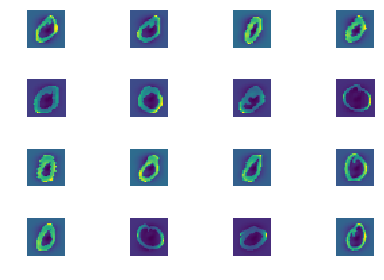

In [18]:
showInputData(X)